### Прогноз цен на авиабилеты

Авиакомпания — это компания, предоставляющая услуги воздушных перевозок пассажиров и грузов. Авиакомпании используют самолеты для предоставления этих услуг и могут заключать партнерские соглашения или альянсы с другими авиакомпаниями в рамках соглашений о код-шеринге, согласно которым они обе предлагают и выполняют один и тот же рейс. Как правило, авиакомпании признаются на основании сертификата или лицензии на осуществление воздушных перевозок, выданной государственным авиационным органом. Авиакомпании могут быть регулярными или чартерными операторами.

Авиакомпании устанавливают цены на свои услуги, стремясь максимизировать прибыль. Ценообразование авиабилетов с годами стало значительно сложнее и в настоящее время в значительной степени определяется компьютеризированными системами управления доходностью.

Цена авиабилета зависит от ряда факторов, таких как продолжительность полета, количество дней до вылета, время прибытия и отправления и т. д. Авиакомпании могут снижать стоимость в моменты, когда им необходимо нарастить спрос, и в моменты, когда билеты менее доступны. Они также могут максимизировать затраты. Цена может зависеть от различных факторов. Каждый фактор имеет свои собственные правила и алгоритмы для установления соответствующей цены. Последние достижения в области искусственного интеллекта (ИИ) и машинного обучения (МО) позволяют выводить такие правила и моделировать изменение цены.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [2]:
df = pd.read_csv("Clean_Dataset.csv", index_col=0)

In [3]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Описание набора данных

* **Airline** (Авиакомпания): Название авиакомпании хранится в столбце «Авиакомпания». Это категория, включающая 6 различных авиакомпаний.
* **Flight** (Рейс): Flight хранит информацию о коде рейса самолета. Это категориальный признак.
* **Source City** (Город-источник): Город, из которого вылетает самолет. Это категория, включающая 6 уникальных городов.
* **Departure Time** (Время отправления): это производная категориальная характеристика, полученная путем группировки временных периодов в интервалы. Она хранит информацию о времени отправления и имеет 6 уникальных временных меток.
* **Stops** (Остановки):Категориальный признак с тремя различными значениями, хранящий количество остановок между городами отправления и назначения.
* **Arrival Time** (Время прибытия): это производная категориальная характеристика, созданная путем группировки временных интервалов в интервалы. Она имеет шесть различных временных меток и содержит информацию о времени прибытия.
* **Destination City** (Город назначения): Город, где приземлится самолет. Это категория, включающая 6 уникальных городов.
* **Class** (Класс): Категориальный признак, содержащий информацию о классе места; имеет два различных значения: Бизнес и Эконом.
* **Duration** (Продолжительность): Непрерывный параметр, отображающий общее время, необходимое для поездки между городами в часах.
* **Days Left** (Осталось дней): это производная характеристика, которая рассчитывается путем вычитания даты поездки из даты бронирования.
* **Price** (Цена): Целевая переменная хранит информацию о цене билета.
не билета.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
df.describe(include='O')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


## Разведочный анализ данных (РАД, EDA)

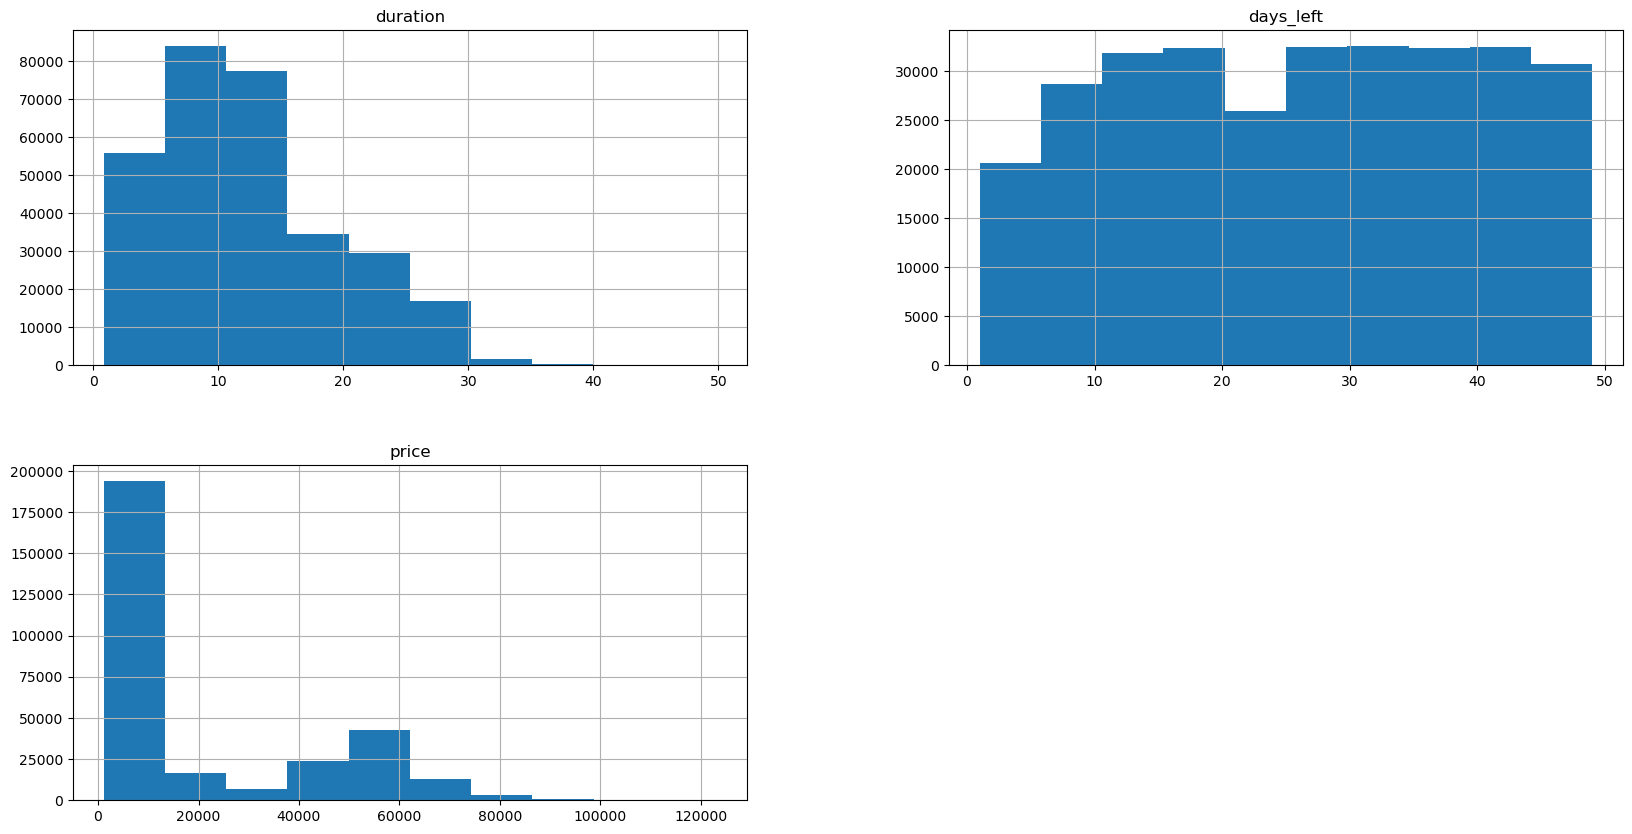

In [7]:
df.hist(figsize=(20,10));

In [8]:
cat_features = [column for column in df.columns if df[column].dtype =="object"]

In [9]:
cat_features

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

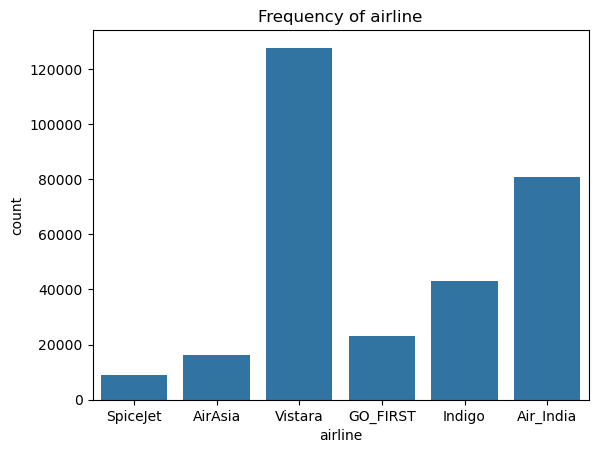

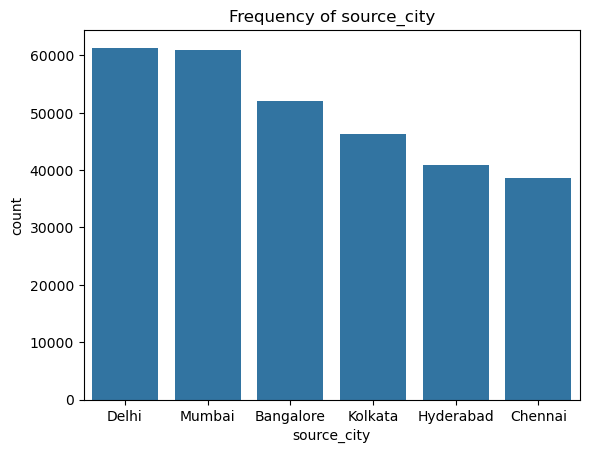

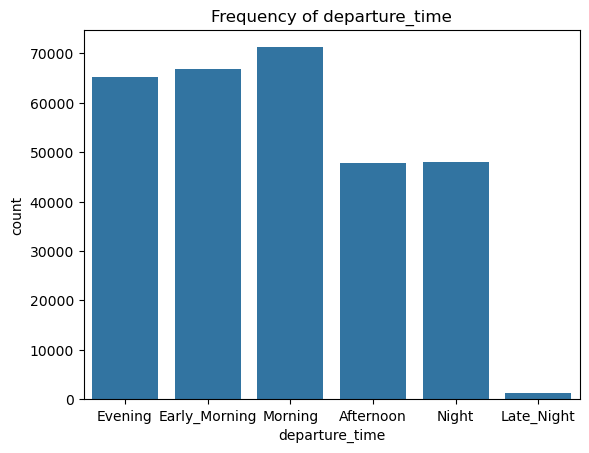

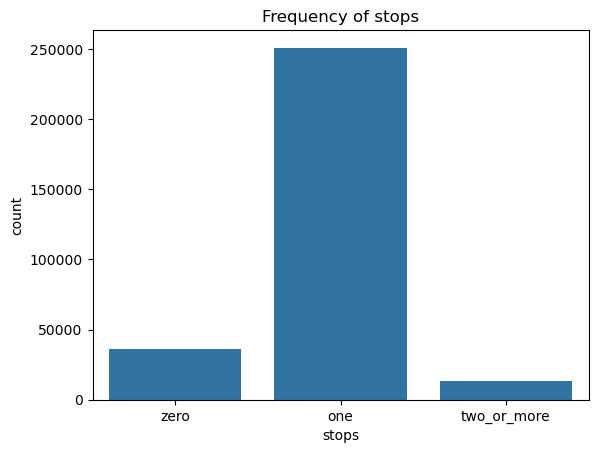

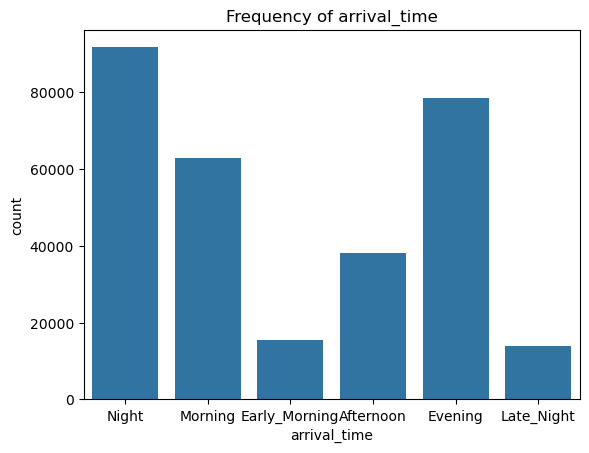

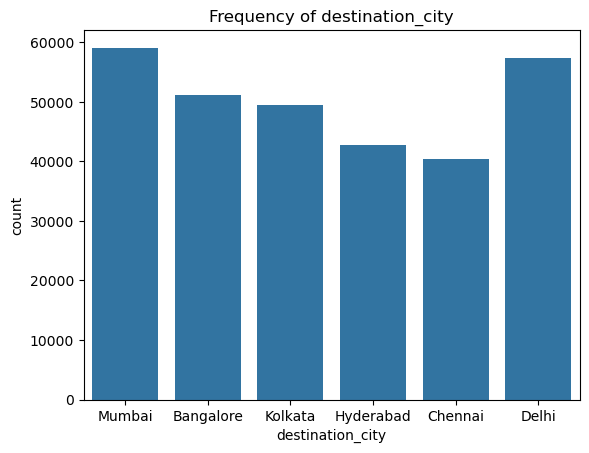

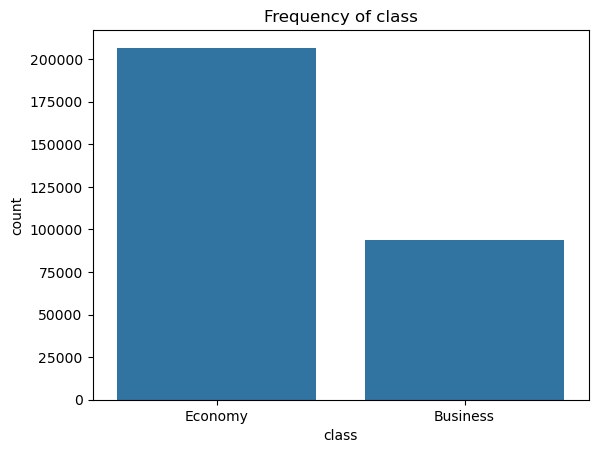

In [10]:
for column in cat_features:
    if column != 'flight':
        sns.countplot(x=df[column], data=df)
        plt.title("Frequency of " + column)
        plt.show()

In [11]:
df[df['flight']=='SG-8709']

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
274,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,3,6060
398,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,4,5953
564,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5,5953
739,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,6,5953
...,...,...,...,...,...,...,...,...,...,...,...
42049,SpiceJet,SG-8709,Delhi,Evening,one,Early_Morning,Chennai,Economy,13.08,43,4942
42053,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,26.42,43,4942
42228,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,26.83,44,4942
42381,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,27.00,45,4942


In [12]:
df[df['flight']=='SG-8709'].head(20)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
274,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,3,6060
398,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,4,5953
564,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5,5953
739,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,6,5953
919,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,7,5953
1105,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,8,5953
1331,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,9,6060
1493,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,10,6270
1644,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,11,5953


In [13]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

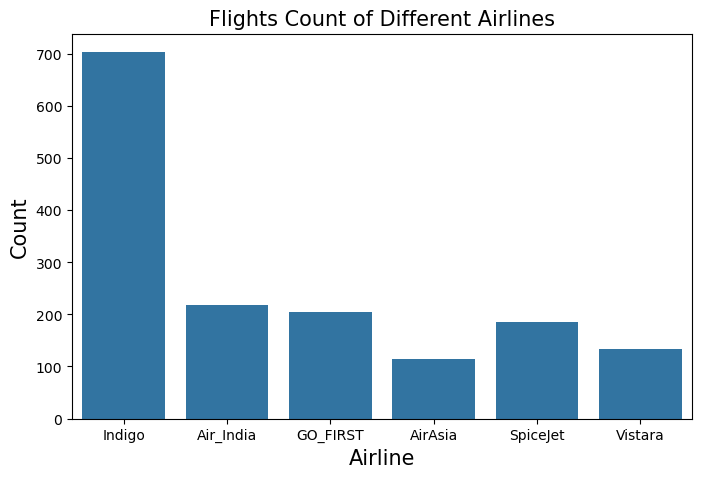

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x=df1['airline'])
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Индиго одна из самых популярных авиакомпаний.

In [15]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

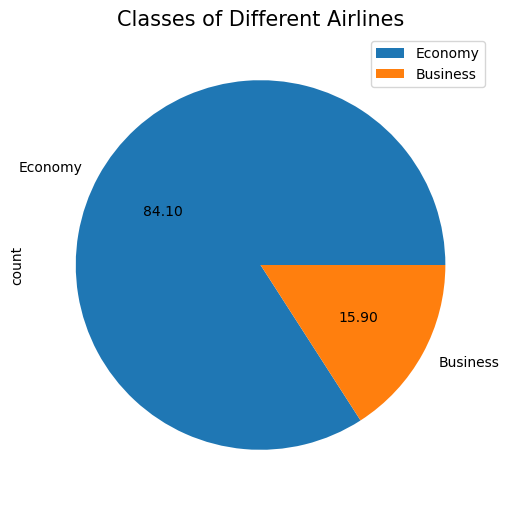

In [16]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

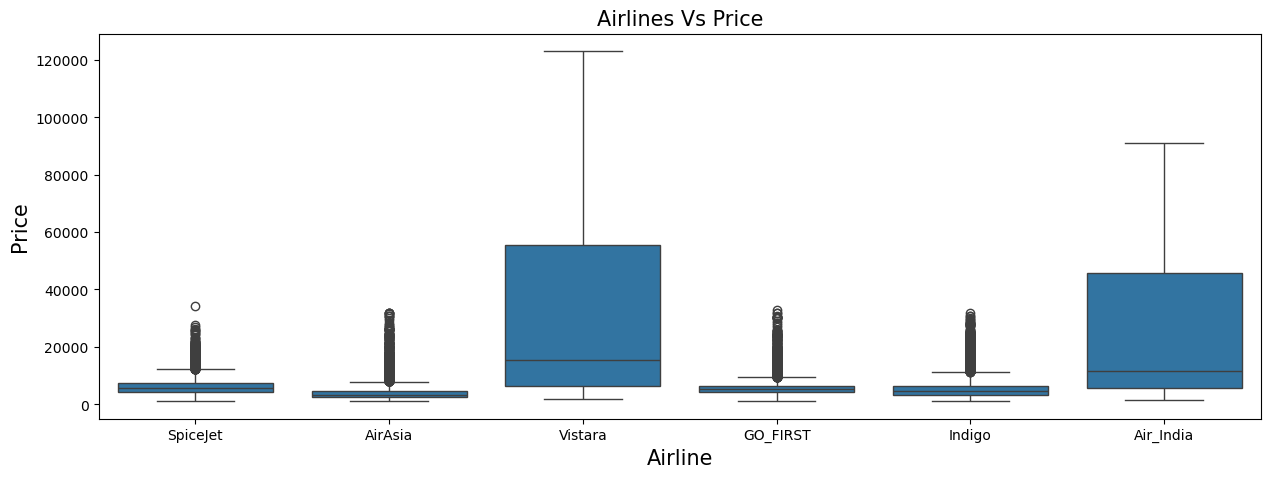

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Авиакомпании Vistara и Air India предлагают самые высокие цены по сравнению с другими. У SpiceJet, AirAsia, GO_First и Indigo цены примерно одинаковые.

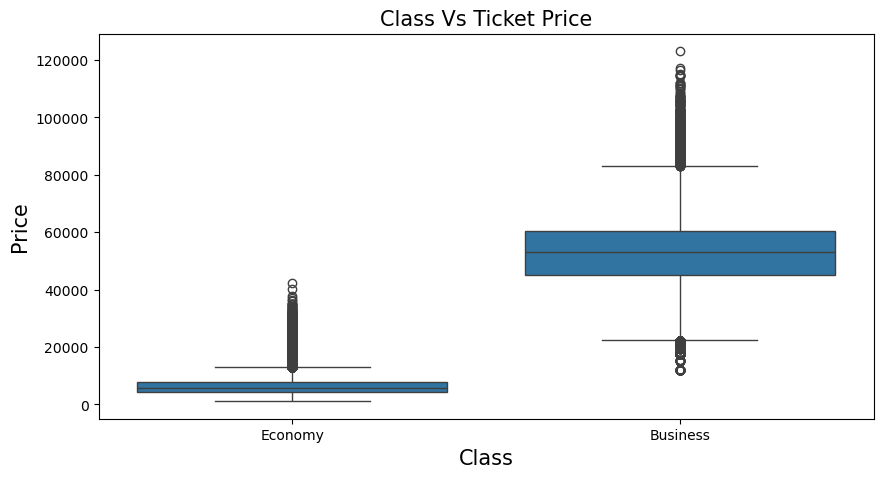

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df)
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Цена билета в бизнес-классе выше, чем в эконом-классе.

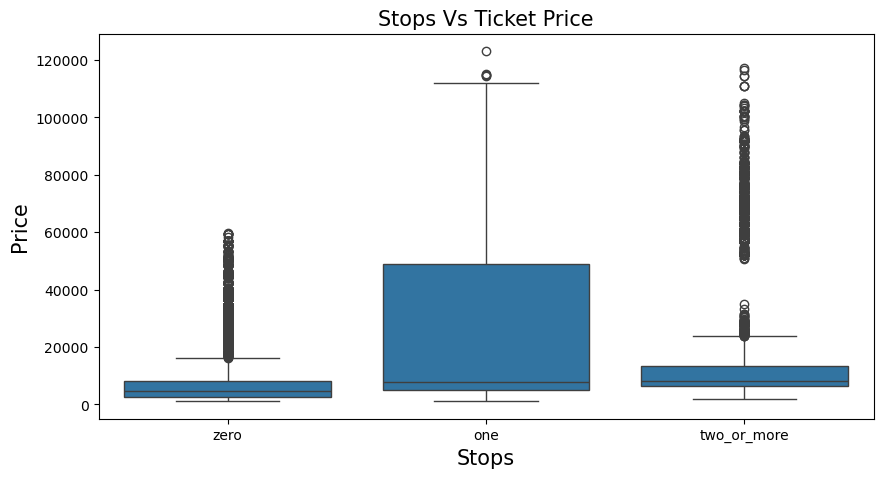

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df)
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

На рейсах с одной пересадкой действует максимальная цена билета.

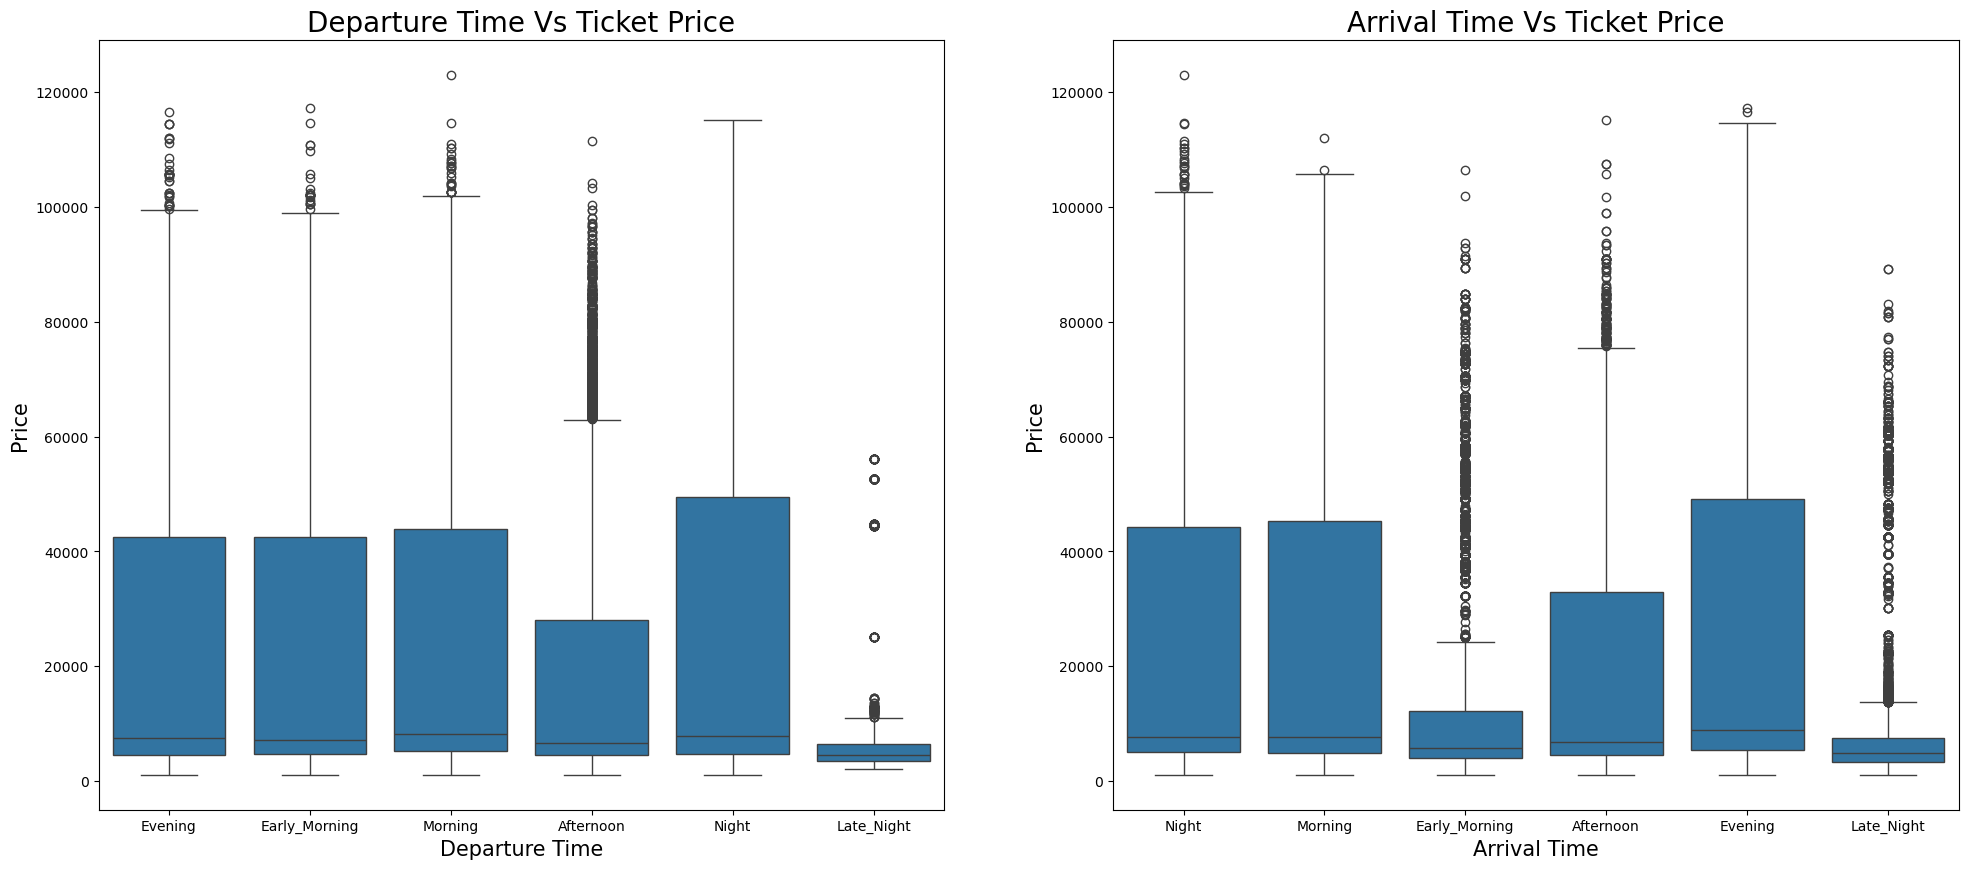

In [20]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df)
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Стоимость билетов на рейсы, вылетающие ночью, выше.
Стоимость билетов практически одинакова для рейсов с вылетом рано утром, утром и вечером.
Низкие цены на билеты на рейсы с поздним ночным вылетом.

Стоимость билетов на рейсы с прибытием вечером выше.
Стоимость билетов практически одинакова для рейсов, прибывающих утром и вечером.
Стоимость билетов низкая на рейсы с поздним ночным временем прибытия, совпадающим со временем отправления.

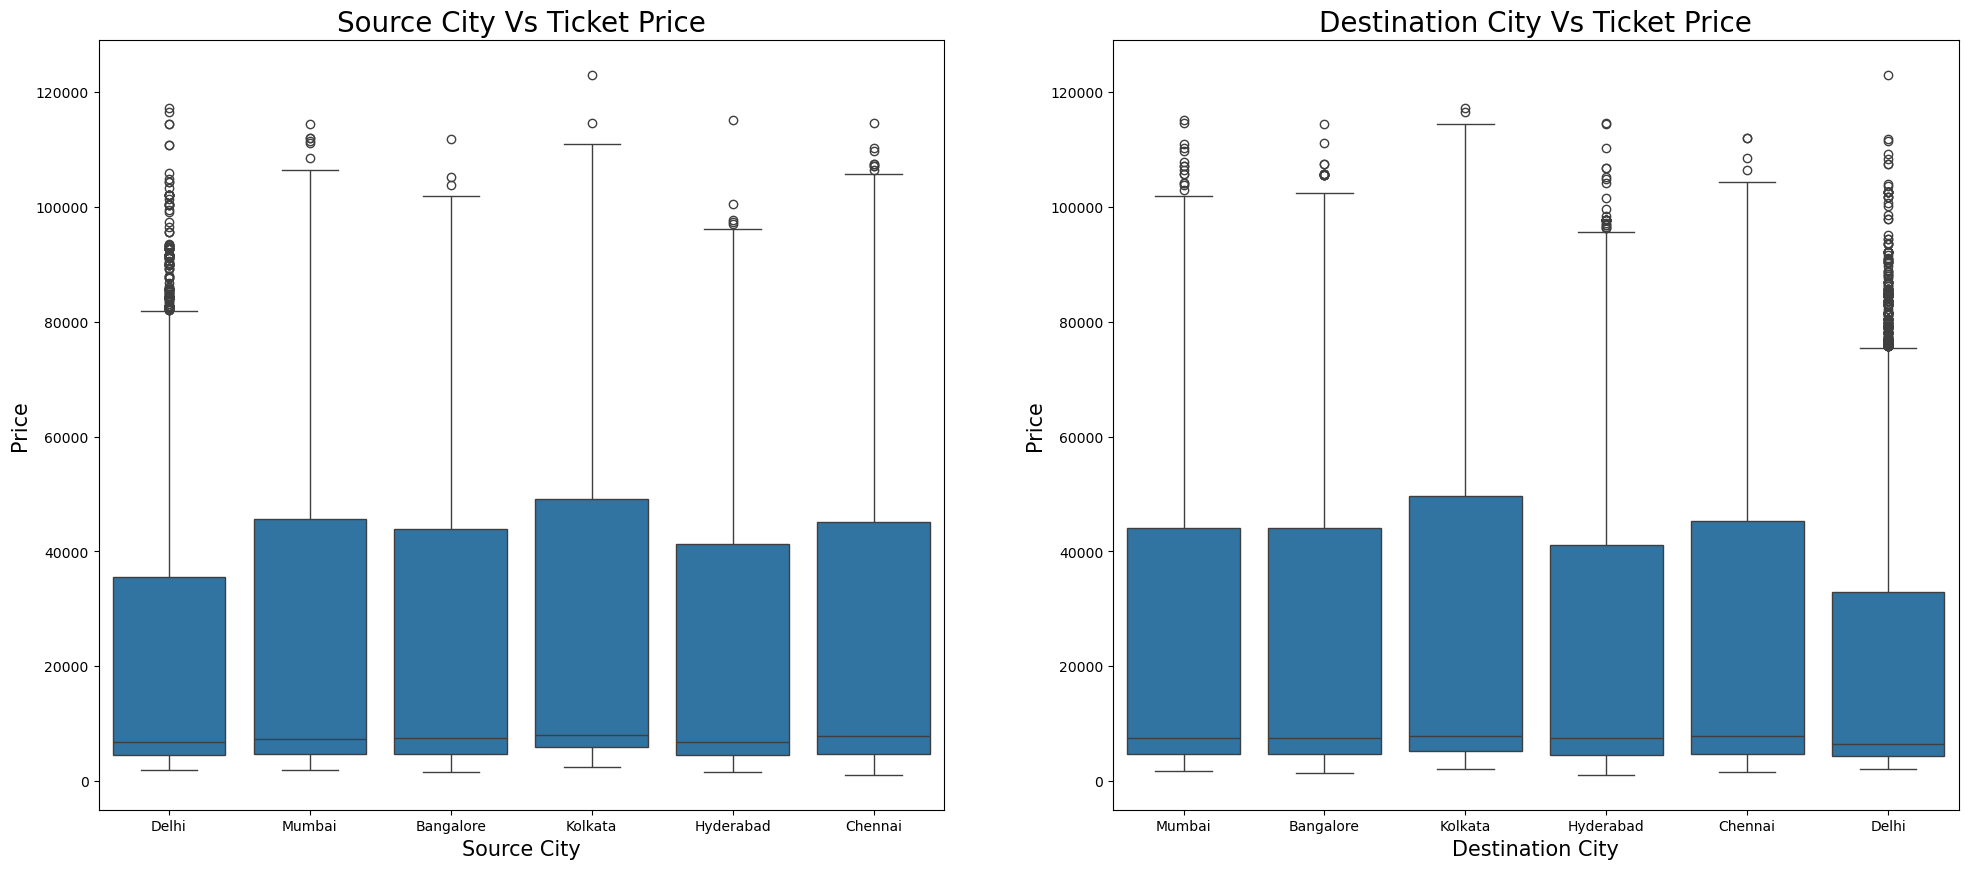

In [21]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df)
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Цена билетов выше на рейсы, вылетающие из Калькутты.
Стоимость билетов практически одинакова для рейсов из таких городов, как Мумбаи и Ченнаи, Хайдарабад и Бангалор.
Цены на билеты на рейсы из Дели низкие.

Стоимость билетов выше на рейсы, пункты назначения которых — Калькутта и Ченнай.
Стоимость билетов на рейсы в такие города, как Мумбай и Бангалор, практически одинакова.
Цены на билеты на рейсы с городом назначения, таким как Дели, низкие.

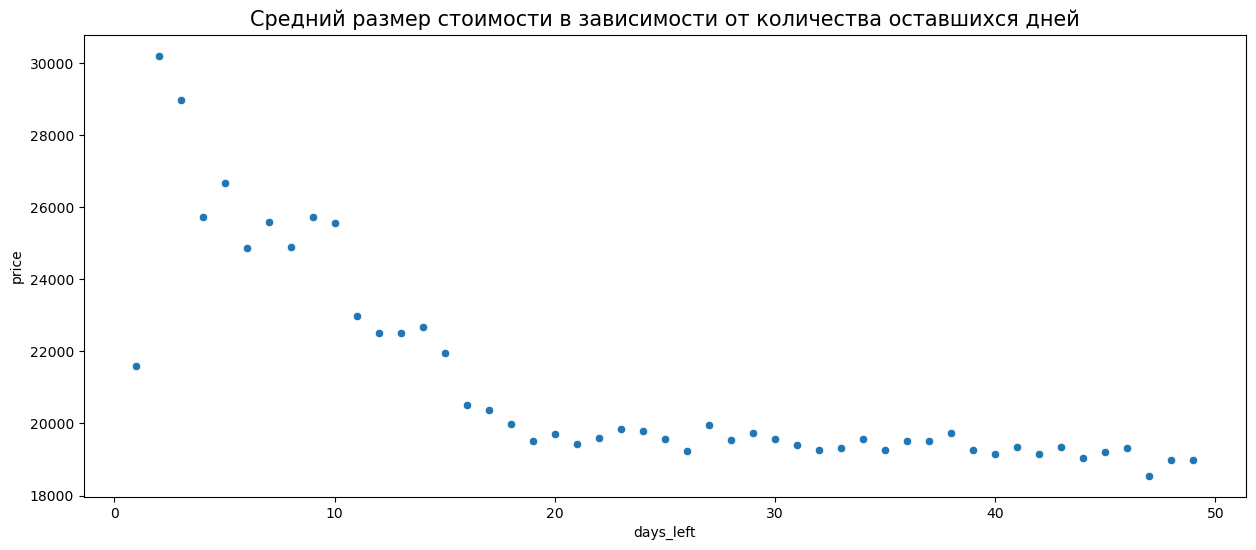

In [22]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Средний размер стоимости в зависимости от количества оставшихся дней",fontsize=15)

Закадируем переменные в числа 


In [23]:
df_map  = df.copy()

In [24]:
df_map['departure_time'] = pd.Categorical(df_map['departure_time']).codes
df_map['arrival_time'] = pd.Categorical(df_map['arrival_time']).codes
df_map['flight'] = pd.Categorical(df_map['flight']).codes
df_map['stops'] = pd.Categorical(df_map['stops']).codes
df_map['source_city'] = pd.Categorical(df_map['source_city']).codes
df_map['destination_city'] = pd.Categorical(df_map['destination_city']).codes
df_map['class'] = pd.Categorical(df_map['class']).codes
df_map['airline'] = pd.Categorical(df_map['airline']).codes

df_map

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


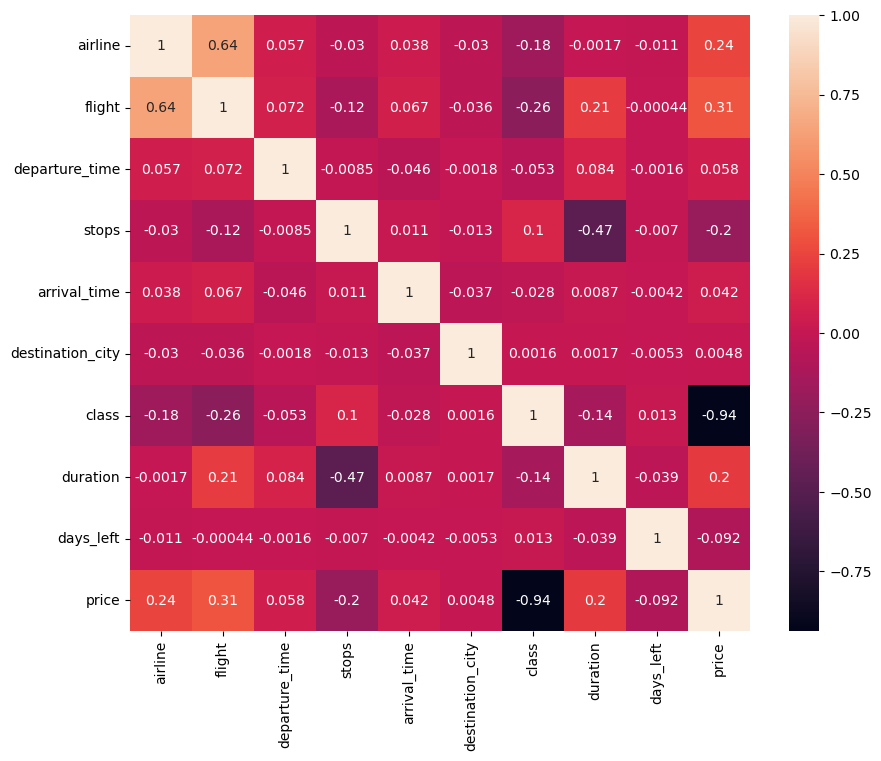

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_map[['airline', 'flight','departure_time','stops','arrival_time', 'destination_city','class','duration','days_left','price']].corr(), annot=True)
plt.show()

по этому heatmap можно увидеть что на цену влияет в основном класс , а также чуть чуть клмпание рейса и код рейса

### oбучение моделей

теперь давайте обучим модели с нашими закодированнами данными


In [26]:
X = (df_map[['airline', 'flight','departure_time','stops','arrival_time', 'destination_city','class','duration','days_left']])
y = (df_map['price'])


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

### linear regression

In [29]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [30]:
predictions = lrm.predict(X_test)
predictions

array([ 4591.12330996, 52653.48815282,  7819.06032985, ...,
       -2123.41491628,  5585.51815622, -3150.13767633])

In [31]:
y_test.round(3)

27131      7366
266857    64831
141228     6195
288329    60160
97334      6578
          ...  
123895     6134
251253    67004
8335       2410
68668      2835
108970     3393
Name: price, Length: 90046, dtype: int64

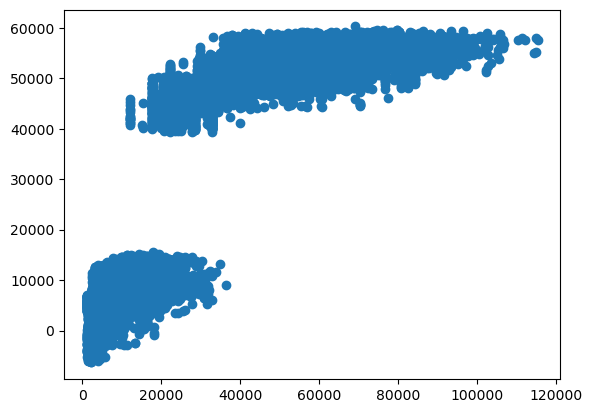

In [32]:
plt.scatter(y_test, predictions)
plt.show()

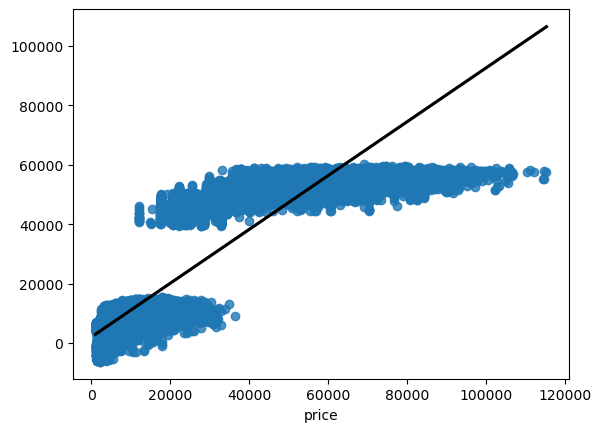

In [33]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})
plt.show()

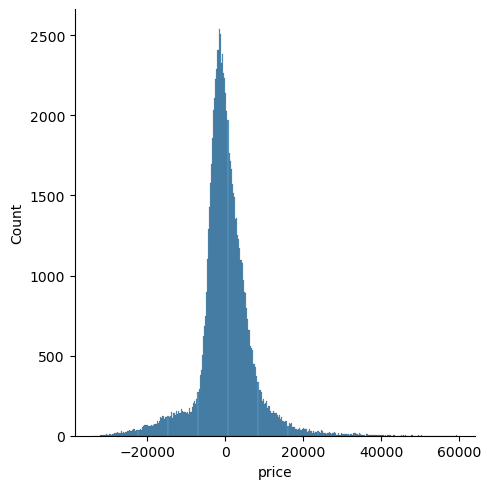

In [34]:
sns.displot((y_test - predictions))
plt.show()

In [35]:
def print_metrics(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print(f'R2 Square {r2_square:.2f}')
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [36]:
train_pred = lrm.predict(X_train)
test_pred = lrm.predict(X_test)
print('Test:\n_____________________________________')
print_metrics(y_test, test_pred)
print()
print('Train:\n_____________________________________')
print_metrics(y_train, train_pred)

Test:
_____________________________________
MAE: 4621.9590965817015
MSE: 49087229.18742752
RMSE: 7006.227885776163
R2 Square 0.90

Train:
_____________________________________
MAE: 4648.068159959953
MSE: 49203151.62020545
RMSE: 7014.495820813171
R2 Square 0.90


In [37]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])


### neighbors regression


In [38]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [39]:
train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

In [40]:
print('Test:\n_____________________________________')
print_metrics(y_test, test_pred)
print()
print('Train:\n_____________________________________')
print_metrics(y_train, train_pred)

Test:
_____________________________________
MAE: 12181.409761677365
MSE: 283331227.5733749
RMSE: 16832.445680095774
R2 Square 0.45

Train:
_____________________________________
MAE: 9577.58768532224
MSE: 182557338.73990586
RMSE: 13511.378121416996
R2 Square 0.65


In [41]:
results_df2 = pd.DataFrame(data=[["KNeighborsRegressor", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df  = pd.concat([results_df, results_df2], ignore_index=True)

### decission tree regressor

In [42]:
tree_1 = DecisionTreeRegressor(random_state=1, max_depth=9)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [43]:
train_pred = tree_1.predict(X_train)
test_pred = tree_1.predict(X_test)
print('Test:\n_____________________________________')
print_metrics(y_test, test_pred)
print()
print('Train:\n_____________________________________')
print_metrics(y_train, train_pred)

Test:
_____________________________________
MAE: 2537.473243166933
MSE: 19928252.204278365
RMSE: 4464.107100448909
R2 Square 0.96

Train:
_____________________________________
MAE: 2529.374273794869
MSE: 19392846.26168344
RMSE: 4403.73094792171
R2 Square 0.96


In [44]:
results_df2 = pd.DataFrame(data=[["DecisionTreeRegressor", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df  = pd.concat([results_df, results_df2], ignore_index=True)

мы обучили и теперь давайте посмотрим как справились наши машины

### сравнение машин

In [45]:
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,4621.959097,4.908723e+07,7006.227886,0.904623
1,KNeighborsRegressor,12181.409762,2.833312e+08,16832.445680,0.449486
2,DecisionTreeRegressor,2537.473243,1.992825e+07,4464.107100,0.961279


<Axes: ylabel='Model'>

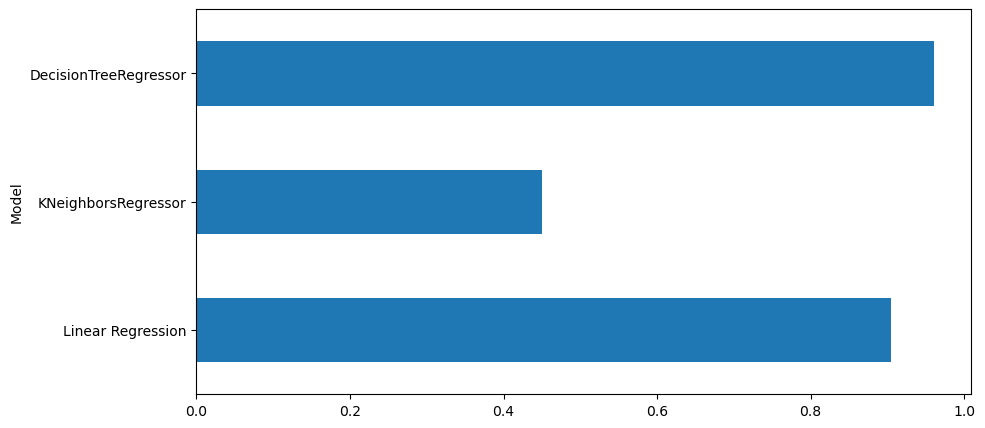

In [46]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(10, 5))

давайте смаштабируем наши данные

In [47]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

In [48]:
mms.transform(X_train)


array([[1.        , 0.97179487, 1.        , ..., 1.        , 0.25693878,
        0.27083333],
       [1.        , 0.97307692, 0.8       , ..., 0.        , 0.17857143,
        0.45833333],
       [1.        , 0.9525641 , 0.2       , ..., 0.        , 0.21102041,
        0.58333333],
       ...,
       [0.2       , 0.54230769, 1.        , ..., 1.        , 0.26204082,
        0.58333333],
       [0.4       , 0.59230769, 0.        , ..., 1.        , 0.15306122,
        0.79166667],
       [0.2       , 0.53397436, 0.        , ..., 1.        , 0.39469388,
        0.33333333]])

In [49]:
X_train_norm = pd.DataFrame(mms.transform(X_train), columns=X_train.columns)
X_train_norm

,airline,flight,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1.0,0.971795,1.0,0.0,0.8,1.0,1.0,0.256939,0.270833
1,1.0,0.973077,0.8,0.0,0.4,0.4,0.0,0.178571,0.458333
2,1.0,0.952564,0.2,0.0,0.4,0.8,0.0,0.211020,0.583333
3,1.0,0.991026,0.4,0.0,1.0,0.0,1.0,0.086735,0.312500
4,0.4,0.719231,0.8,0.0,1.0,0.4,1.0,0.239796,0.916667
...,...,...,...,...,...,...,...,...,...
210102,1.0,0.934615,0.4,0.0,0.0,0.4,1.0,0.401429,0.020833
210103,1.0,0.969872,1.0,0.0,1.0,0.2,0.0,0.501837,0.125000
210104,0.2,0.542308,1.0,0.0,0.8,1.0,1.0,0.262041,0.583333
210105,0.4,0.592308,0.0,0.0,1.0,0.6,1.0,0.153061,0.791667


In [50]:
X_train_norm.describe()

,airline,flight,departure_time,stops,arrival_time,destination_city,class,duration,days_left
count,210107.000000,210107.000000,210107.000000,210107.000000,210107.000000,210107.000000,210107.000000,210107.000000,210107.000000
mean,0.621558,0.698411,0.482995,0.142109,0.615605,0.517652,0.688587,0.232286,0.521451
std,0.366751,0.273200,0.350663,0.332950,0.348296,0.349039,0.463072,0.146702,0.282672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.502564,0.200000,0.000000,0.400000,0.200000,0.000000,0.120816,0.291667
50%,0.600000,0.733333,0.400000,0.000000,0.800000,0.600000,1.000000,0.212653,0.520833
75%,1.000000,0.952564,0.800000,0.000000,1.000000,0.800000,1.000000,0.313061,0.770833
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
X_test_norm = pd.DataFrame(mms.transform(X_test), columns=X_train.columns)
X_test_norm.describe()

,airline,flight,departure_time,stops,arrival_time,destination_city,class,duration,days_left
count,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000
mean,0.619614,0.695880,0.484570,0.142027,0.612978,0.517680,0.688415,0.232900,0.519722
std,0.366423,0.274265,0.351303,0.332827,0.348416,0.348607,0.463144,0.146947,0.282166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.498718,0.200000,0.000000,0.400000,0.200000,0.000000,0.122449,0.270833
50%,0.600000,0.728846,0.400000,0.000000,0.800000,0.600000,1.000000,0.212653,0.520833
75%,1.000000,0.952564,0.800000,0.000000,1.000000,0.800000,1.000000,0.313061,0.770833
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.957551,1.000000


In [61]:
from sklearn.metrics import r2_score
knn.fit(X_train_norm, y_train)

KNeighborsRegressor()

In [63]:
pred_train = knn.predict(X_train_norm)
pred_test = knn.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')


Train R2 0.98
Test R2 0.96


In [64]:
results_df3 = pd.DataFrame(data=[["KNeighborsRegressor", metrics.r2_score(y_test, pred_test)]], 
                          columns=['Model', 'R2 score norm'])

In [65]:
tree_1.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [66]:
pred_train = tree_1.predict(X_train_norm)
pred_test = tree_1.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')
results_df33 = pd.DataFrame(data=[["DecisionTreeRegressor", metrics.r2_score(y_test, pred_test)]], 
                          columns=['Model', 'R2 score norm'])
results_df3  = pd.concat([results_df3, results_df33], ignore_index=True)

Train R2 0.96
Test R2 0.96


In [67]:
results_df33 = pd.DataFrame(data=[["DecisionTreeRegressor", metrics.r2_score(y_test, pred_test)]], 
                          columns=['Model', 'R2 score norm'])
results_df3  = pd.concat([results_df3, results_df33], ignore_index=True)
lrm.fit(X_train_norm, y_train)

LinearRegression()

In [68]:
pred_train = lrm.predict(X_train_norm)
pred_test = lrm.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.90
Test R2 0.90


In [70]:
results_df33 = pd.DataFrame(data=[["Linear Regression", metrics.r2_score(y_test, pred_test)]], 
                          columns=['Model', 'R2 score norm'])
results_df3  = pd.concat([results_df3, results_df33], ignore_index=True)
results_df3 

,Model,R2 score norm
0,KNeighborsRegressor,0.962867
1,DecisionTreeRegressor,0.961279
2,DecisionTreeRegressor,0.961279
3,Linear Regression,0.904623
4,Linear Regression,0.904623


In [71]:
results = pd.merge(results_df, results_df3, on='Model')
results

,Model,MAE,MSE,RMSE,R2 Square,R2 score norm
0,Linear Regression,4621.959097,4.908723e+07,7006.227886,0.904623,0.904623
1,Linear Regression,4621.959097,4.908723e+07,7006.227886,0.904623,0.904623
2,KNeighborsRegressor,12181.409762,2.833312e+08,16832.445680,0.449486,0.962867
3,DecisionTreeRegressor,2537.473243,1.992825e+07,4464.107100,0.961279,0.961279
4,DecisionTreeRegressor,2537.473243,1.992825e+07,4464.107100,0.961279,0.961279


### Стандартизация

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [73]:
X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_train_std

,airline,flight,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1.031881,1.000674,1.474368,-0.426818,0.529421,1.381935,0.672494,0.168050,-0.886605
1,1.031881,1.005366,0.904019,-0.426818,-0.619031,-0.337076,-1.487001,-0.366146,-0.223290
2,1.031881,0.930283,-0.807030,-0.426818,-0.619031,0.808931,-1.487001,-0.144955,0.218920
3,1.031881,1.071065,-0.236680,-0.426818,1.103647,-1.483084,0.672494,-0.992157,-0.739202
4,-0.604111,0.076207,0.904019,-0.426818,1.103647,-0.337076,0.672494,0.051195,1.398146
...,...,...,...,...,...,...,...,...,...
210102,1.031881,0.864585,-0.236680,-0.426818,-1.767483,-0.337076,0.672494,1.152975,-1.771025
210103,1.031881,0.993635,1.474368,-0.426818,1.103647,-0.910080,-1.487001,1.837413,-1.402517
210104,-1.149441,-0.571389,1.474368,-0.426818,0.529421,1.381935,0.672494,0.202829,0.218920
210105,-0.604111,-0.388373,-1.377379,-0.426818,1.103647,0.235927,0.672494,-0.540038,0.955936


In [74]:
X_train_std.describe()

,airline,flight,departure_time,stops,arrival_time,destination_city,class,duration,days_left
count,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05
mean,2.938796e-17,2.323729e-16,4.795412e-17,-4.031122e-17,1.049377e-16,1.189384e-16,-7.135627e-18,-3.395341e-17,-1.352725e-18
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.694772e+00,-2.556412e+00,-1.377379e+00,-4.268177e-01,-1.767483e+00,-1.483084e+00,-1.487001e+00,-1.583389e+00,-1.844726e+00
25%,-1.149441e+00,-7.168638e-01,-8.070298e-01,-4.268177e-01,-6.190310e-01,-9.100801e-01,-1.487001e+00,-7.598371e-01,-8.129034e-01
50%,-5.878006e-02,1.278268e-01,-2.366804e-01,-4.268177e-01,5.294208e-01,2.359273e-01,6.724945e-01,-1.338261e-01,-2.185368e-03
75%,1.031881e+00,9.302828e-01,9.040186e-01,-4.268177e-01,1.103647e+00,8.089310e-01,6.724945e-01,5.506127e-01,8.822343e-01
max,1.031881e+00,1.103914e+00,1.474368e+00,2.576645e+00,1.103647e+00,1.381935e+00,6.724945e-01,5.233176e+00,1.692952e+00


In [75]:
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_test_std.describe()

,airline,flight,departure_time,stops,arrival_time,destination_city,class,duration,days_left
count,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000
mean,-0.005298,-0.009266,0.004492,-0.000244,-0.007544,0.000079,-0.000372,0.004187,-0.006117
std,0.999108,1.003901,1.001827,0.999633,1.000346,0.998765,1.000157,1.001674,0.998213
min,-1.694772,-2.556412,-1.377379,-0.426818,-1.767483,-1.483084,-1.487001,-1.583389,-1.844726
25%,-1.149441,-0.730942,-0.807030,-0.426818,-0.619031,-0.910080,-1.487001,-0.748708,-0.886605
50%,-0.058780,0.111402,-0.236680,-0.426818,0.529421,0.235927,0.672494,-0.133826,-0.002185
75%,1.031881,0.930283,0.904019,-0.426818,1.103647,0.808931,0.672494,0.550613,0.882234
max,1.031881,1.103914,1.474368,2.576645,1.103647,1.381935,0.672494,4.943819,1.692952


Обучим Модели на теперь маштабированых данных


In [78]:
knn.fit(X_train_std, y_train)

KNeighborsRegressor()

In [79]:
pred_train = knn.predict(X_train_std)
pred_test = knn.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')
results_df4 = pd.DataFrame(data=[["KNeighborsRegressor", metrics.r2_score(y_test, pred_test)]], 
                          columns=['Model', 'R2 score stand'])

Train R2 0.98
Test R2 0.96


In [80]:
tree_1.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [81]:
pred_train = tree_1.predict(X_train_std)
pred_test = tree_1.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')
results_df44 = pd.DataFrame(data=[["DecisionTreeRegressor", metrics.r2_score(y_test, pred_test)]], 
                          columns=['Model', 'R2 score stand'])
results_df4  = pd.concat([results_df4, results_df44], ignore_index=True)

Train R2 0.96
Test R2 0.96


In [82]:
lrm.fit(X_train_std, y_train)


LinearRegression()

In [83]:
pred_train = lrm.predict(X_train_std)
pred_test = lrm.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')
results_df44 = pd.DataFrame(data=[["Linear Regression", metrics.r2_score(y_test, pred_test)]], 
                          columns=['Model', 'R2 score stand'])
results_df4  = pd.concat([results_df4, results_df44], ignore_index=True)

Train R2 0.90
Test R2 0.90


In [84]:
results_df4 

,Model,R2 score stand
0,KNeighborsRegressor,0.963403
1,DecisionTreeRegressor,0.961279
2,Linear Regression,0.904623


In [85]:
results = pd.merge(results, results_df4, on='Model')
results


,Model,MAE,MSE,RMSE,R2 Square,R2 score norm,R2 score stand
0,Linear Regression,4621.959097,4.908723e+07,7006.227886,0.904623,0.904623,0.904623
1,Linear Regression,4621.959097,4.908723e+07,7006.227886,0.904623,0.904623,0.904623
2,KNeighborsRegressor,12181.409762,2.833312e+08,16832.445680,0.449486,0.962867,0.963403
3,DecisionTreeRegressor,2537.473243,1.992825e+07,4464.107100,0.961279,0.961279,0.961279
4,DecisionTreeRegressor,2537.473243,1.992825e+07,4464.107100,0.961279,0.961279,0.961279


In [86]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_metrics(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_metrics(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 4626.723257937692
MSE: 49086762.46279055
RMSE: 7006.194577856838
R2 Square 0.90
Train set evaluation:
_____________________________________
MAE: 4653.030290826005
MSE: 49205409.0505428
RMSE: 7014.656730770424
R2 Square 0.90


In [87]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_metrics(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_metrics(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 17850.516615690485
MSE: 450055889.9658565
RMSE: 21214.520733824193
R2 Square 0.13
Train set evaluation:
_____________________________________
MAE: 17913.19023658834
MSE: 451956905.25516695
RMSE: 21259.27809816615
R2 Square 0.12


Итог : по итогу у нас самым лучшим моделем оказалось decision tree regressor a вот самым худшим по результатам оказалась KNeighborsRegressor , во время работы с этим заданием самым сложной частью окакзалась с запутыванием результатов всех моделей по итогу которого в итоговом результате есть повторения 